# Credit Markets: Final Exam - Problem 4

# FINM 35700 - Spring 2024

### UChicago Financial Mathematics

### May 7 2024 - from 6pm to 8:45pm

* Alex Popovici
* alex.popovici@uchicago.edu

## Scoring: Total of 155 points

| Problem | Points |
|---------|--------|
| 1: Overall understanding of credit models | 40     |
| 2: Risk and scenario analysis for a fixed rate corporate bond | 20     |
| 3: CDS calibration and pricing | 20     |
| 4: **Derivation of fixed rate bond PVs and DV01s in `sympy`** | **25 <--**    |
| 5: LQD ETF basket analysis - bucketed DV01 risks | 25     |
| 6: Nelson-Siegel model for smooth hazard rates: ORCL curve | 25     |
| Total   | 155    |

### Important:
* You only need 100 points to reach 100% of the grade (out of 155 points in the problems)!
* All functions used in previous homeworks are pre-loaded and ready to use, via credit_market_tools!
* Please submit on time: late submissions (after 8:45pm) will be penalized at a rate of "1 point per minute"!


In [1]:
# import tools from previous homeworks
from credit_market_tools import *

# Use static calculation/valuation date of 2024-05-03, matching data available in the market prices EOD file
calc_date = ql.Date(3, 5, 2024)
ql.Settings.instance().evaluationDate = calc_date

# Calculation/valuation date as pd datetime
as_of_date = pd.to_datetime('2024-05-03')

------------------------------------------------------------------
# Problem 4: Derivation of fixed rate bond PVs and DV01s in `sympy` (25 points)

Starting from the fair value formula for risky fixed rate bonds in the `flat yield model`, you will derive the formulas for
* Zero coupon bonds (principal payment only, no coupons) and
* "Interest Only" / IO bonds (coupon payments only, no principal payment)

Assume T+0 settlement and zero accrued.

### Flat Yield Model Parameters
* bond face value of 100%
* bond maturity T (in years),
* semi-annual coupon c,
* flat yield y

According to formula [5] in Lecture 1, the bond present value is given by:

\begin{align}
BondPV=B(0,T,c,y)
\end{align}

\begin{align}
=\sum_{k=1}^{2T}\frac{c}{2}\cdot e^{-k\cdot\frac{y}{2}}+e^{-T\cdot y}
\end{align}

\begin{align}
= 1+\frac{\frac{c}{2}-\left( e^{\frac{y}{2}}-1 \right)}{e^{\frac{y}{2}}-1 } \cdot \left(1-e^{-T\cdot y}\right)
\end{align}


The example code below explains how to implement the present value function for the generic fixed rate bond.

It uses the 'sympy' library (symbolic mathematics) to translate mathematical formulas into a sympy symbolic equation, as described in the solution to Homework 3, Problem 2.

The sympy symbolic equation is converted into a Python function via sympy.lambdify.

The function `plot_bond_function_surface(bond_func, 'Plot Title')` plots the Python bond function on a "yield x maturity" 2D discretization grid:

* in yield space: [y from 0% to 10% in steps of 0.5%] and 
* in time-to-maturity space: [T from 1Y to 20Y in steps of 1Y].

We assume a bond coupon c of 5% for plotting purposes.

Analytic formula for bond_pv: (1 - exp(-T*y))*(c/2 - exp(y/2) + 1)/(exp(y/2) - 1) + 1


(1 - exp(-T*y))*(c/2 - exp(y/2) + 1)/(exp(y/2) - 1) + 1

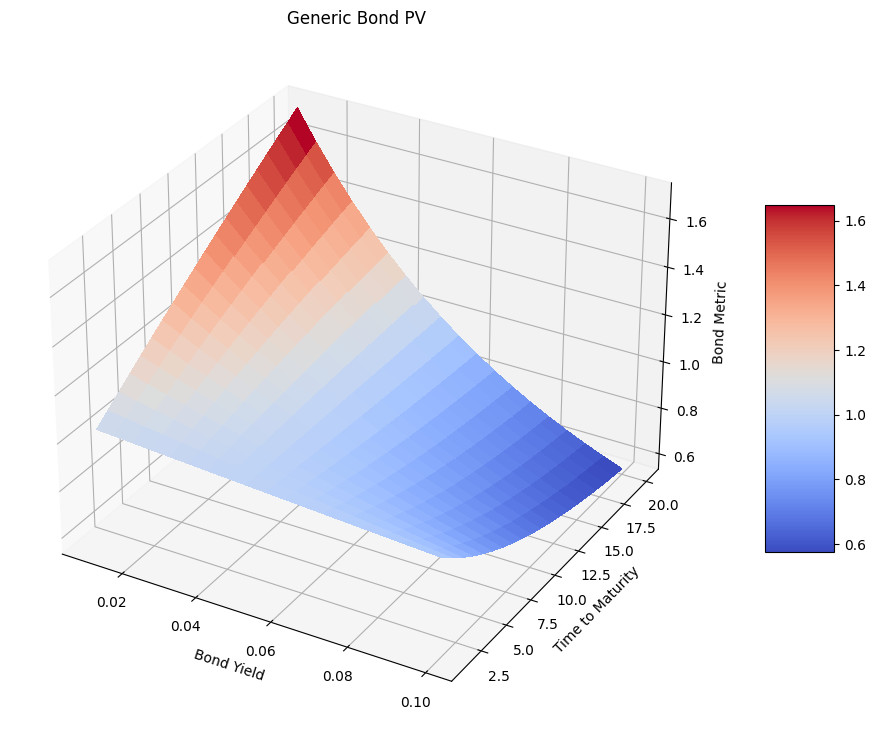

In [ ]:
# define symbolic variables
T = sp.symbols('T')
c = sp.symbols('c')
y = sp.symbols('y')

# define symbolic equation for bond pv
bond_pv_eq =  1 + (c/2 -(sp.exp(y/2) - 1)) / (sp.exp(y/2) - 1) * (1 - sp.exp(-T*y))
print('Analytic formula for bond_pv:', bond_pv_eq)
display(bond_pv_eq)

# create function(y,T,y) from equation
bond_pv_func = sp.lambdify([c,T,y], bond_pv_eq)

# Plot the surface
plot_bond_function_surface(bond_pv_func, 'Generic Bond PV')


## 4a. Derive and implement the present value functions for a Zero Coupon bond. (5 points)

Follow the solution to Homework 3, Problem 2c.

Derive and display the analytic formula for a Zero Coupon bond PV.

Plot the Zero Coupon bond PV surface on the "yield x maturity" 2D discretization grid.

## 4b. Derive and implement the DV01 of a Zero Coupon bond. (5 points)

Use the sympy "diff()" function to compute the derivative of the Zero Coupon bond PV with respect to the bond yield.

Plot the Zero Coupon bond DV01 surface on the "yield x maturity" 2D discretization grid.


## 4c. Derive and implement the present value function for an Interest Only bond. (5 points)

Keep in mind that any generic fixed rate bond can be decomposed into Zero Coupon and Interest Only components.

Plot the Interest Only bond PV surface on the "yield x maturity" 2D discretization grid.

## 4d. Derive and implement the DV01 of an Interest Only bond. (5 points)

Use the sympy "diff()" function to compute the derivative of the Interest Only bond PV.

Plot the Interest Only bond DV01 surface on the "yield x maturity" 2D discretization grid.


## 4e. For which bond coupon $c^*$ are the Interest Only PV and the Zero Coupon PV equal?   (5 points)
 
### Find the bond coupon $c^*$ satisfying:

\begin{align}
InterestOnlyPV(c^*, y,T) = ZeroCouponPV(y,T)
\end{align}

Display the formula for $c^*$.